In [1]:
import os
os.getcwd()

'/Users/yuangu/Downloads/houseprice'

In [16]:
import pandas as pd
import numpy as np
import catboost as cb 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import tkinter
from sklearn.impute import SimpleImputer
from sklearn.metrics import auc
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from pandas_profiling import ProfileReport
from catboost import CatBoostRegressor
from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import accuracy_score
from ipywidgets import interact  
import ipywidgets as widgets  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold,train_test_split, RepeatedKFold
from sklearn.metrics import mean_squared_error as mse
import xgboost as xgb
%matplotlib inline

# Suppress the warning outputs

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the output displaying: max number of rows & max number of columns 

In [5]:
pd.set_option('display.max_columns', 100)  # or 1000
pd.set_option('display.max_rows', 100)  # or 1000

# Import the data, train and test 

In [7]:
train = pd.read_csv('/Users/yuangu/Downloads/houseprice/train.csv')
test= pd.read_csv('/Users/yuangu/Downloads/houseprice/test.csv')

## Look at basic informations about the train and test data: dimensions and columns 

In [8]:
print(test.shape)
print(train.shape)
print(train.columns)
print(test.equals(train)) ## check if the columns are the same 
print([i for i in train.columns if i not in test.columns]) # find out that only SalePrice is not in test

(1459, 80)
(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

In [9]:
train.head(5) # look at the details of the data, including numerical and char columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Histogram of the output variable and take the log transformation to see the distributions

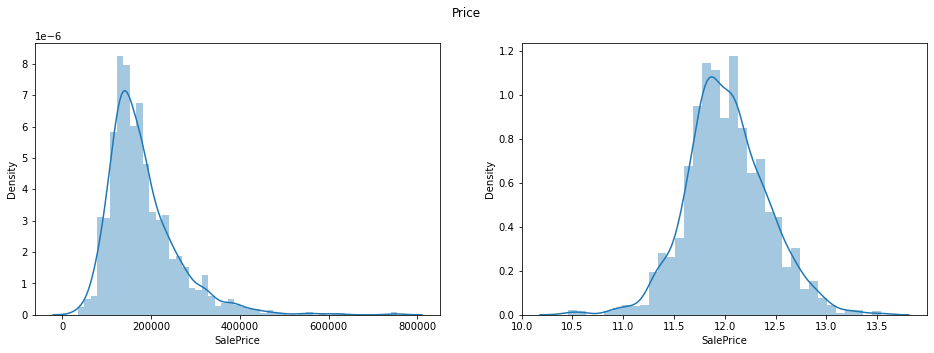

In [17]:
#sns.set(rc={'figure.figsize':(9,3)})
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,5))
s = sns.distplot((train['SalePrice']),ax = ax1)
s = sns.distplot(np.log(train['SalePrice']), ax = ax2)
plt.suptitle("Price")
plt.show(); ## after taking the log, it is more normally distributed 

## Look at missing data and some variable distribution

<AxesSubplot:>

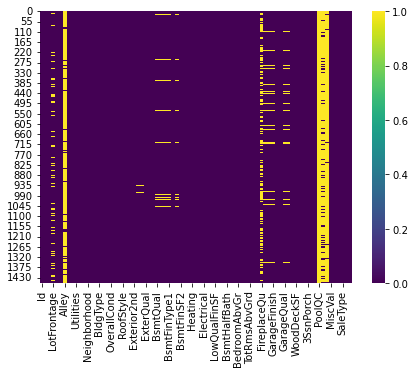

In [18]:
#train.isnull().sum() * 100 / len(train)
# Exploring missing data and checking if any has NaN values
plt.figure(figsize=(7, 5))
sns.heatmap(train.isnull(), cmap='viridis') # some variable have many missing values, need to check those variables
#train.isnull().any() 

In [19]:
train.isnull().sum().sort_values(ascending =False)[:25] ## 19 variables contain missing values 

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

## After looking at those missing variables in detail, 
### take some variables as the examples: 
### some missing values are actually meaning 0, so do the following imputations:

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

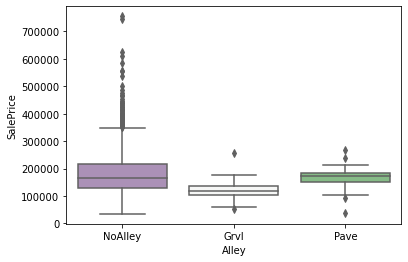

In [20]:
train['Alley'] = train['Alley'].replace(np.nan, "NoAlley")
sns.boxplot( x="Alley", y="SalePrice", data=train, palette="PRGn",showfliers=True)
## after impute the missing by "NoAlley", look at the boxplot, it seems no very obvious distinct range 
## between NoAlley and other groups, but NoAlley has a lot outliers, which also might because most of 
## the values are NoAlley

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

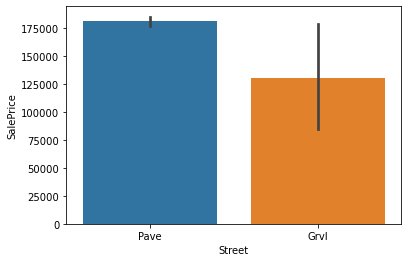

In [21]:
train[train['LotFrontage'].isnull()]
pd.crosstab(train.LotFrontage, train.Street, dropna=False)
sns.barplot(x="Street", y="SalePrice", data=train) ## look at the difference of saleprice between two groups of LotFrontage

<AxesSubplot:xlabel='GarageType'>

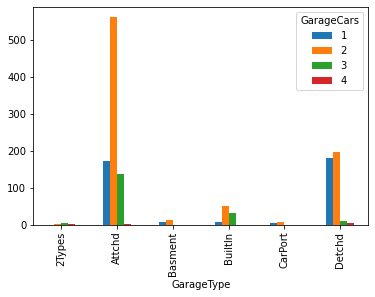

In [22]:
pd.crosstab(train.GarageType, train.GarageCars).plot(kind="bar")
## check if clear trend between garagetype and garagecars, seems Attached and Dettaced has more observations, 
## most of the families have 1-2 cars 

# After checking all missing varaibles 
# handle missing values and also generate some extra potential variables

In [23]:
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','MasVnrType']:
    train[i].fillna('None',inplace=True)
    test[i].fillna('None',inplace=True)

garages = ['GarageType','GarageFinish','GarageQual','GarageCond']
train[garages]= train[garages].replace(np.nan, "NoGarage")
test[garages]= test[garages].replace(np.nan, "NoGarage")
train['MasVnrArea'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)
train['LotFrontage'].fillna(np.mean(train['LotFrontage']), inplace=True)
test['LotFrontage'].fillna(np.mean(test['LotFrontage']), inplace=True)


train = train.drop(["PoolQC","Fence","MiscFeature",'GarageYrBlt','Id'], axis=1)   
test = test.drop(["PoolQC","Fence","MiscFeature",'GarageYrBlt','Id'], axis=1)   

train['Alley'] = train['Alley'].replace(np.nan, "NoAlley")
test['Alley'] = test['Alley'].replace(np.nan, "NoAlley")
train['FireplaceQu'] = train['FireplaceQu'].replace(np.nan, "NoFireplace")
test['FireplaceQu'] = test['FireplaceQu'].replace(np.nan, "NoFireplace")

# Generate some new variables, such as house age, total house are, total number of rooms etc

In [24]:
train['houseage1'] = train['YrSold'] - train['YearBuilt']+1
train['houseage2'] = train['YrSold'] - train['YearRemodAdd']+1
train['total_area'] = np.log1p(train['GrLivArea'] + train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'])
train['num_rooms'] = train['TotRmsAbvGrd'] + train['BedroomAbvGr'] + train['FullBath']
test['houseage1'] = test['YrSold'] - test['YearBuilt']+1
test['houseage2'] = test['YrSold'] - test['YearRemodAdd']+1
test['total_area'] = np.log1p(test['GrLivArea'] + test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF'])
test['num_rooms'] = test['TotRmsAbvGrd'] + test['BedroomAbvGr'] + test['FullBath']


In [25]:
train['bath_rooms'] = train['HalfBath'] + train['FullBath']
test['bath_rooms'] = test['HalfBath'] + test['FullBath']

In [26]:
train['logsaleprice'] = np.log(train['SalePrice'])
train = train.drop(['SalePrice'], axis=1)   

In [27]:
train['totalsf'] = train["1stFlrSF"] + train["2ndFlrSF"] + train["TotalBsmtSF"] 
test['totalsf'] = test["1stFlrSF"] + test["2ndFlrSF"] + test["TotalBsmtSF"] 
train['otherarea'] = train["LotArea"] - train["GrLivArea"] + train["GarageArea"] 
test['otherarea'] = test["LotArea"]- test["GrLivArea"] + test["GarageArea"] 

# Look at categorical variables

In [28]:
cols=train.select_dtypes(exclude='number').columns.to_list()
cat=train[cols].astype('category') ## all categorical variables
cata_price=pd.concat([train[cat.columns.to_list()], train['logsaleprice']], axis=1)

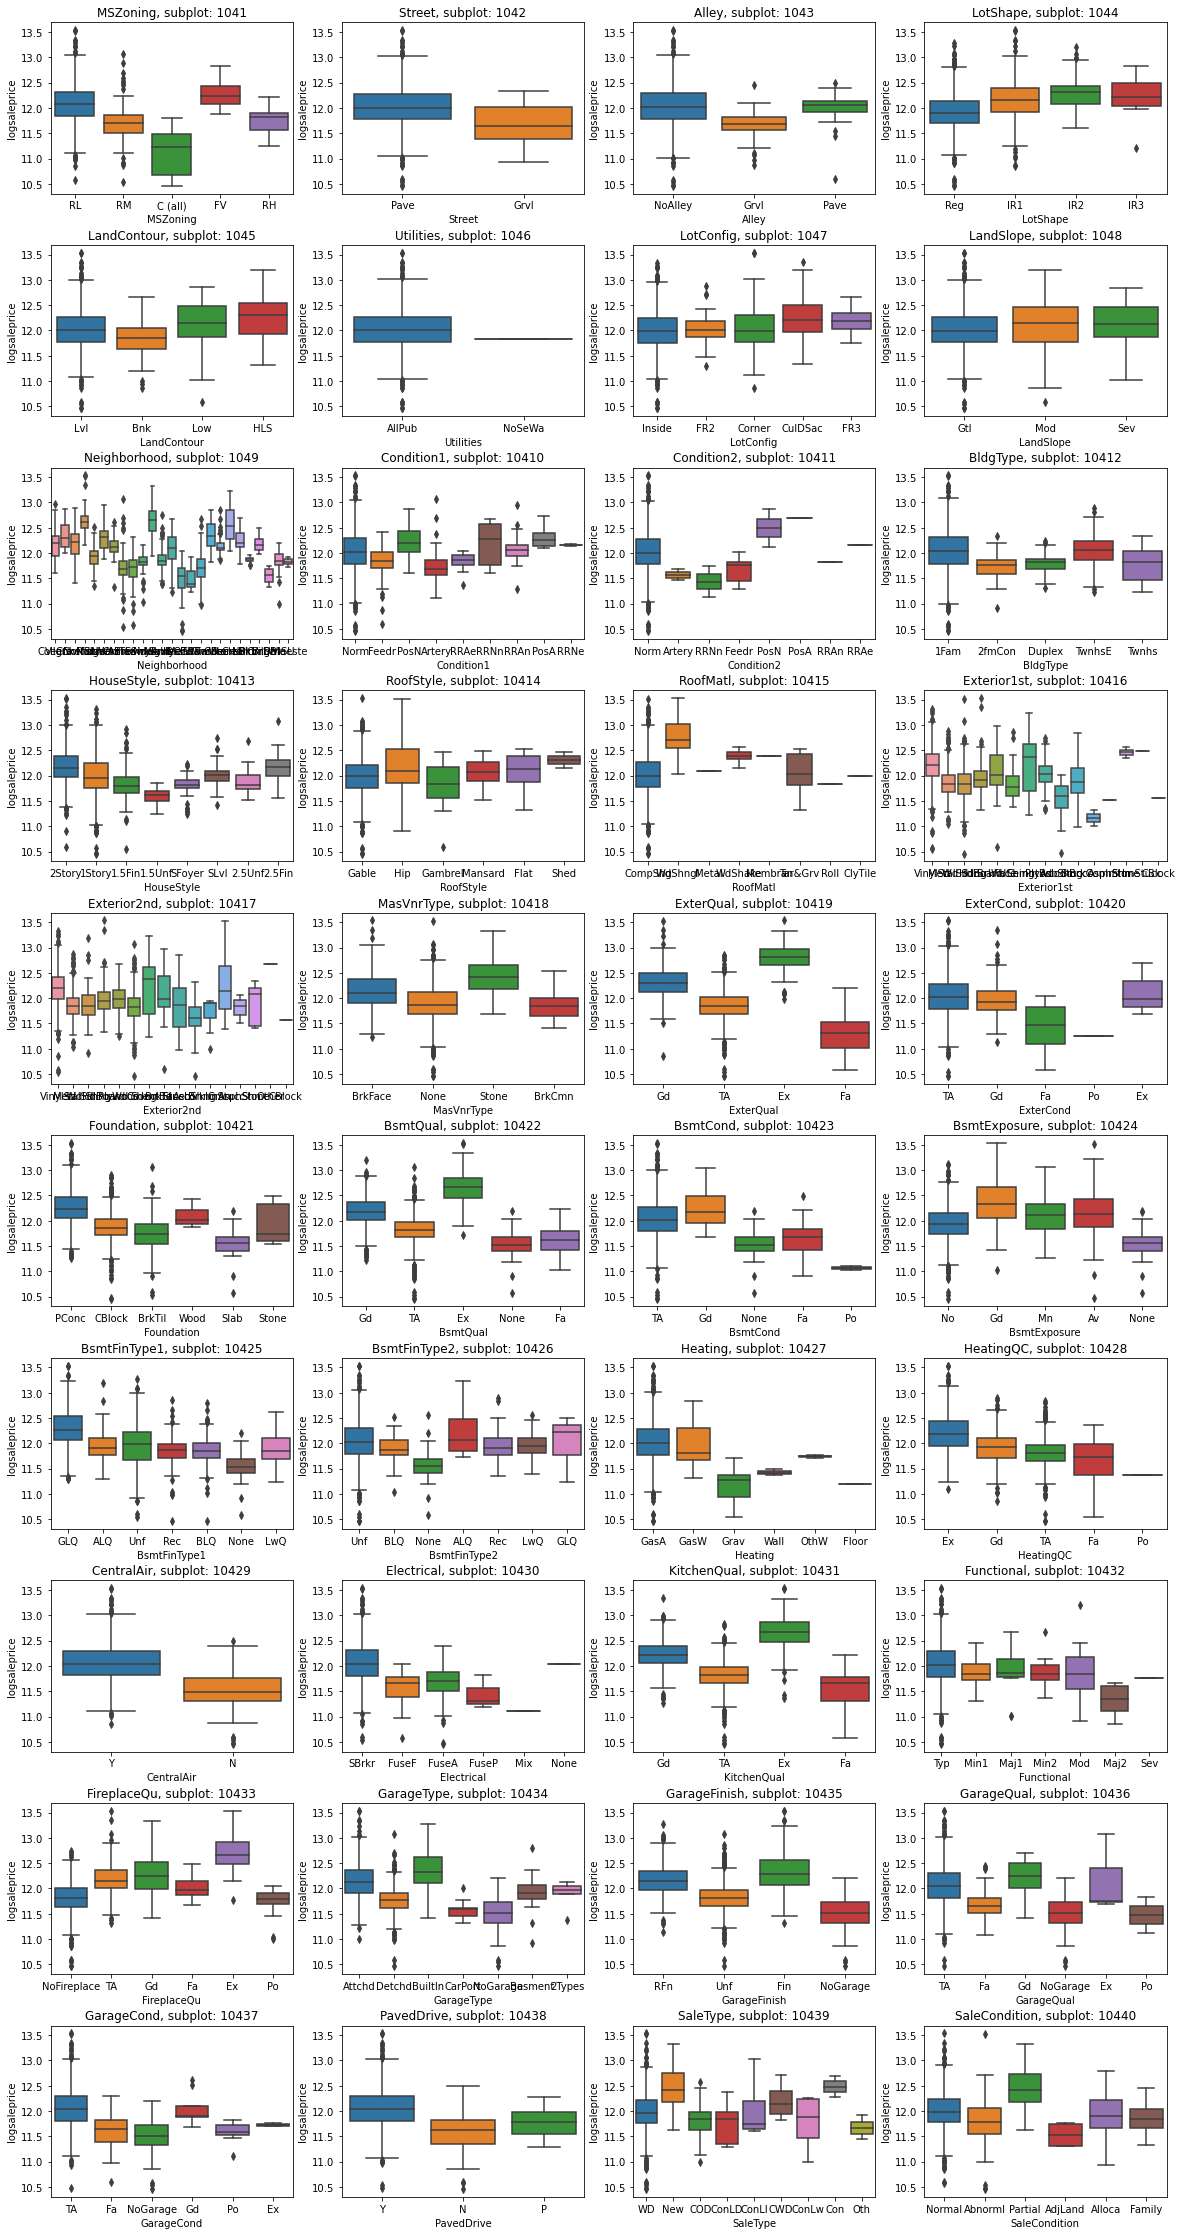

In [29]:
#  Categorical Data
a = 10  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,40))

for column in cata_price.columns[:-1]:
    plt.subplot(a, b, c)
    plt.subplots_adjust(hspace=0.3)
    plt.title('{}, subplot: {}{}{}'.format(column, a, b, c))
    plt.xlabel(column)
    sns.boxplot(x=column, y="logsaleprice", data=cata_price)
    c = c + 1

plt.show()
## look at the boxplots, and we can see some variables have similar patterns on the log price,such as 
## KitchenQual vs GarageFinish; GarageQual vs SaleCondition; MasVnrType vs ExterQual 

# Look at numerical variables 

In [30]:
nums = train.select_dtypes(include='number')
vals= [i for i in nums.columns if i!='logsaleprice'] 

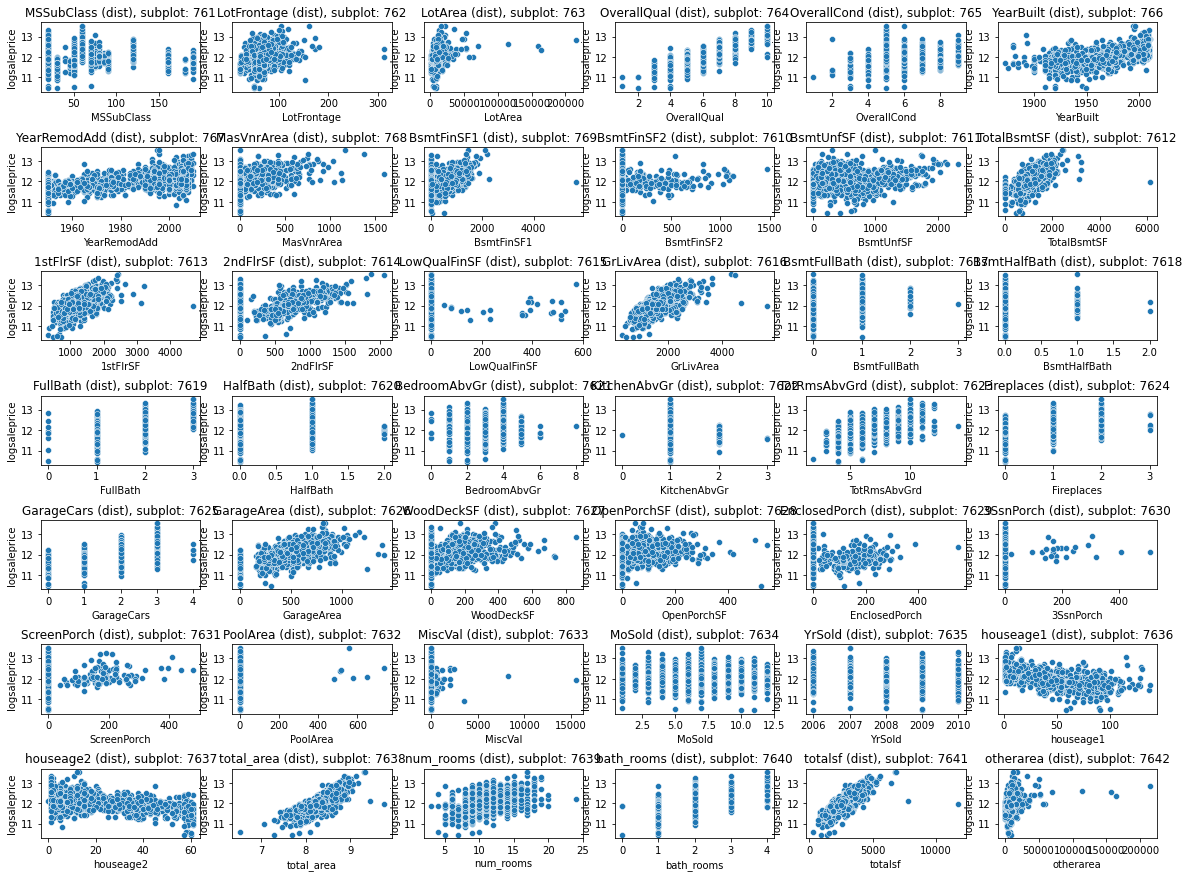

In [31]:
#  plot Numerical Data
a = 7  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in vals:
    plt.subplot(a, b, c)
    plt.subplots_adjust(hspace=0.8)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data=train, x=train[i], y="logsaleprice")
    c = c + 1

plt.show()
## some numerical variables have clear increasing trend when price is up, such as GrLivArea, YearBuild, 
## total area might have some polynomial trend but not only linear

# Checking outliers 
## I didn't remove the outliers here, because those outliers might also provide some information 
## For example, some luxury house with very large LotArea might have extrem high price 

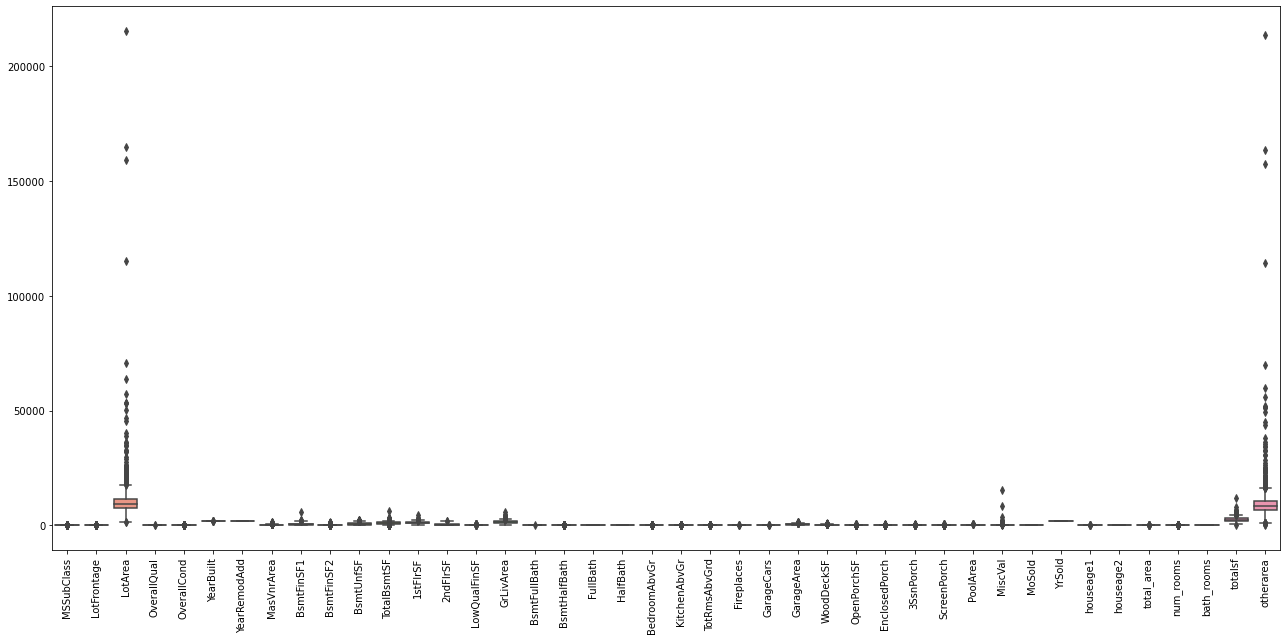

In [32]:
#checking for outliers
plt.figure(figsize=(22,10))
plt.xticks(rotation =90)
sns.boxplot(data = train[vals])
plt.show()

# Checking corrections between all those numerical variables 
## Briefly look at the linear relationship between numberical variables

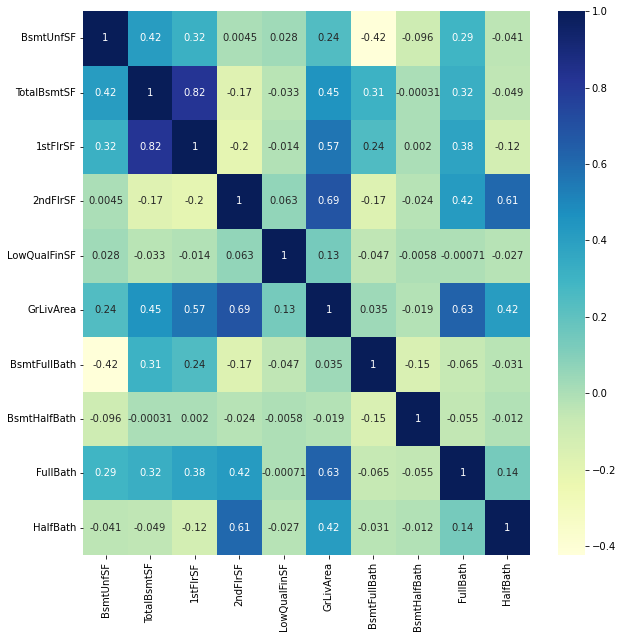

In [33]:
# Looking at the correlation table, only showing part of them, otherwise plot is too large
plt.figure(figsize = (10,10))
#print(train[vals].iloc[:,0:10])
sns.heatmap(train[vals].iloc[:,10:20].corr(),cmap="YlGnBu", annot=True)
plt.show() ## seems 1stFlrSF btw BsmtUnfSF has high correlation = 0.82, GrLivAre btw 2ndFlrSF has corrlation = 0.69
## however the tree algorithm are noneparametric modeling, they can handle high correlation better than regression

# Convert categorical to dummy variables 

In [34]:
cols_train=train.select_dtypes(exclude='number').columns.to_list()
cat_train=train[cols_train].astype('category')
train1= pd.get_dummies(data=train, columns=cat_train.columns, prefix='cat', prefix_sep='_')
train1 = train1.loc[:,~train1.columns.duplicated()]

In [35]:
cols_test=test.select_dtypes(exclude='number').columns.to_list()
cat_test=test[cols_test].astype('category')
test1= pd.get_dummies(data=test, columns=cat_test.columns, prefix='cat', prefix_sep='_')
test1 = test1.loc[:,~test1.columns.duplicated()]

In [36]:
print([i for i in train1.columns if i not in test1.columns]) 

['logsaleprice', 'cat_NoSeWa', 'cat_2.5Fin', 'cat_ClyTile', 'cat_Membran', 'cat_Metal', 'cat_Roll', 'cat_Other', 'cat_Floor', 'cat_OthW', 'cat_Mix']


# Drop those variables 

In [37]:
train1 = train1.drop(['cat_NoSeWa', 'cat_2.5Fin', 'cat_ClyTile', 'cat_Membran', 'cat_Metal', 'cat_Roll', 'cat_Other', 'cat_Floor', 'cat_OthW', 'cat_Mix'],axis=1)
train1.shape

(1460, 203)

In [67]:
test1.shape

# Split train dataset into train vs validation 

In [38]:
X = train1.loc[:, train1.columns!='logsaleprice']  
y = train1['logsaleprice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 10)

# Cat boost model 

## model parameter tuning 

In [39]:
def rmsle(y_log, y0_log):
    return np.sqrt(np.mean(np.square(y_log - y0_log)))

def catboost(X_train,y_train,X_val, y_val):
    param = { 'iterations': 3000,
            'od_type':'Iter',
            'learning_rate':0.05,
            'depth':5,
            'bagging_temperature':0.2,
             'eval_metric':'RMSE',
             'random_seed': 1234,
            'metric_period':50,
            'od_wait': 50}

    param_test1 = {
     'depth':[5],
     'bagging_temperature':[0.2,0.3],
     'learning_rate':[0.05,0.1],
      }

    gsearch = GridSearchCV(CatBoostRegressor(learning_rate = param['learning_rate'], 
                                                 depth=param['depth'],
                                                 eval_metric=param['eval_metric'],
                                                 random_seed = param['random_seed'],
                                                 bagging_temperature = param['bagging_temperature'],
                                                 od_type= param['od_type'],
                                                 metric_period = param['metric_period'],
                                                 od_wait=param['od_wait']
                                                ),
                            param_grid = param_test1, scoring='neg_mean_squared_error',iid=False, cv=5)
    
    gsearch.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, verbose=50)
    print(gsearch.cv_results_)
    print(gsearch.best_params_)
    print(gsearch.best_score_)
    return gsearch.best_estimator_

## using the tuned paramters

In [40]:
cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=5,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
cbevaluate=cb_model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, verbose=50, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3793506	test: 0.4058924	best: 0.4058924 (0)	total: 65.9ms	remaining: 32.9s
50:	learn: 0.1499060	test: 0.1720292	best: 0.1720292 (50)	total: 158ms	remaining: 1.39s
100:	learn: 0.1148381	test: 0.1408525	best: 0.1408525 (100)	total: 254ms	remaining: 1s
150:	learn: 0.1013330	test: 0.1343614	best: 0.1343279 (149)	total: 352ms	remaining: 814ms
200:	learn: 0.0915680	test: 0.1302769	best: 0.1302769 (200)	total: 447ms	remaining: 665ms
250:	learn: 0.0837638	test: 0.1278792	best: 0.1278395 (248)	total: 544ms	remaining: 539ms
300:	learn: 0.0772794	test: 0.1263854	best: 0.1263854 (300)	total: 645ms	remaining: 426ms
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.1258349462
bestIteration = 327

Shrink model to first 328 iterations.


In [41]:
cbresult= cbevaluate.get_evals_result()

## Plot the RMSE vs iterations, we see that the RMSE is decresing to ~ 0.125 on the validation set 

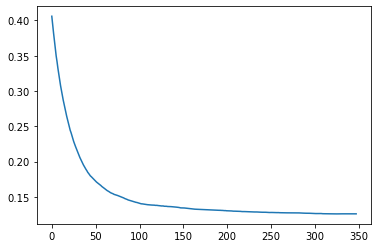

In [42]:
plt.plot(list(range(0, 348)), cbresult['validation']['RMSE'])

In [43]:
cbevaluate.get_best_score()

{'learn': {'RMSE': 0.07727941758584343},
 'validation': {'RMSE': 0.12583494620857316}}

## The feature importance plot showed us the top important variables 

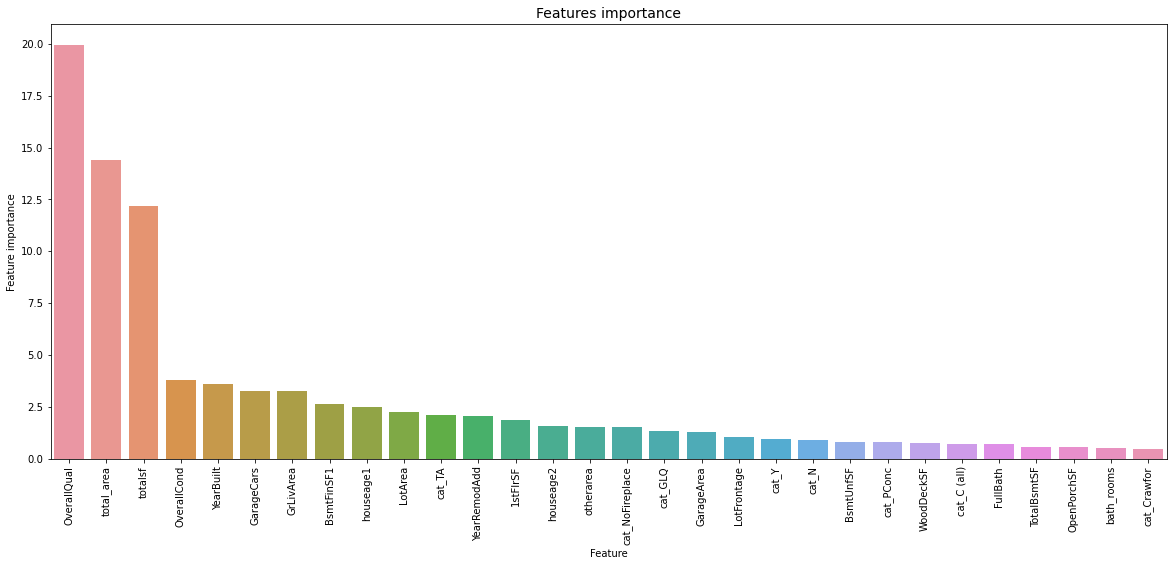

In [44]:
tmp_cat = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': cb_model.feature_importances_})
tmp_cat = tmp_cat.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (20,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp_cat[:30])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [45]:
tmp_cat[:20]

,Feature,Feature importance
3,OverallQual,19.945804
37,total_area,14.405560
40,totalsf,12.201707
4,OverallCond,3.789364
5,YearBuilt,3.595454
24,GarageCars,3.294456
15,GrLivArea,3.292836
8,BsmtFinSF1,2.648276
35,houseage1,2.502803
2,LotArea,2.242549


In [46]:
validatey=cb_model.predict(X_val)
rmsle(y_val, validatey)

0.12583493436525897

# Xgboost model 

# the parameters has already by tuned 

In [47]:
xgbmodel= xgb.XGBRegressor(learning_rate=0.05, 
                           max_depth=5, 
                           min_child_weight=1, 
                           n_estimators=500, 
                           random_state=1234,
                           alpha=0.01, 
                           subsample=0.8,
                           colsample_bytree=0.6,
                           tree_method='exact', 
                           eval_metric='rmse')

In [48]:
#xgbmodel.fit(X_train, y_train)
#model.fit(train_X, train_y, early_stopping_rounds=50, eval_set=[(test_X, test_y)], verbose=True)
xgbmodelfit=xgbmodel.fit(X_train, y_train, verbose=True, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:10.94141
[1]	validation_0-rmse:10.39532
[2]	validation_0-rmse:9.87553
[3]	validation_0-rmse:9.38242
[4]	validation_0-rmse:8.91395
[5]	validation_0-rmse:8.46871
[6]	validation_0-rmse:8.04614
[7]	validation_0-rmse:7.64407
[8]	validation_0-rmse:7.26327
[9]	validation_0-rmse:6.90097
[10]	validation_0-rmse:6.55665
[11]	validation_0-rmse:6.23010
[12]	validation_0-rmse:5.92009
[13]	validation_0-rmse:5.62547
[14]	validation_0-rmse:5.34542
[15]	validation_0-rmse:5.07933
[16]	validation_0-rmse:4.82631
[17]	validation_0-rmse:4.58662
[18]	validation_0-rmse:4.35824
[19]	validation_0-rmse:4.14166
[20]	validation_0-rmse:3.93576
[21]	validation_0-rmse:3.73990
[22]	validation_0-rmse:3.55393
[23]	validation_0-rmse:3.37769
[24]	validation_0-rmse:3.20949
[25]	validation_0-rmse:3.04986
[26]	validation_0-rmse:2.89820
[27]	validation_0-rmse:2.75484
[28]	validation_0-rmse:2.61810
[29]	validation_0-rmse:2.48811
[30]	validation_0-rmse:2.36515
[31]	validation_0-rmse:2.24819
[32]	validation_

[260]	validation_0-rmse:0.13215
[261]	validation_0-rmse:0.13218
[262]	validation_0-rmse:0.13218
[263]	validation_0-rmse:0.13221
[264]	validation_0-rmse:0.13217
[265]	validation_0-rmse:0.13214
[266]	validation_0-rmse:0.13213
[267]	validation_0-rmse:0.13219
[268]	validation_0-rmse:0.13213
[269]	validation_0-rmse:0.13216
[270]	validation_0-rmse:0.13221
[271]	validation_0-rmse:0.13220
[272]	validation_0-rmse:0.13219
[273]	validation_0-rmse:0.13211
[274]	validation_0-rmse:0.13202
[275]	validation_0-rmse:0.13201
[276]	validation_0-rmse:0.13196
[277]	validation_0-rmse:0.13200
[278]	validation_0-rmse:0.13195
[279]	validation_0-rmse:0.13198
[280]	validation_0-rmse:0.13197
[281]	validation_0-rmse:0.13201
[282]	validation_0-rmse:0.13201
[283]	validation_0-rmse:0.13201
[284]	validation_0-rmse:0.13195
[285]	validation_0-rmse:0.13192
[286]	validation_0-rmse:0.13186
[287]	validation_0-rmse:0.13184
[288]	validation_0-rmse:0.13178
[289]	validation_0-rmse:0.13181
[290]	validation_0-rmse:0.13174
[291]	va

500


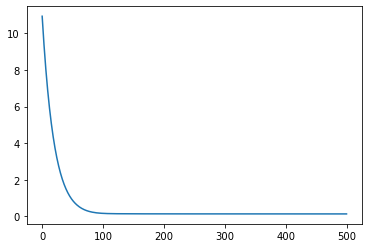

In [49]:
evals_result = xgbmodelfit.evals_result()
tempresulst = evals_result['validation_0']['rmse']
print(len(tempresulst))
plt.plot(list(range(0, 500)), tempresulst)

# The best RMSE is 0.132

In [50]:
xgb_valid=xgbmodel.predict(X_val)
rmsle(y_val, xgb_valid)

0.13055837771881193

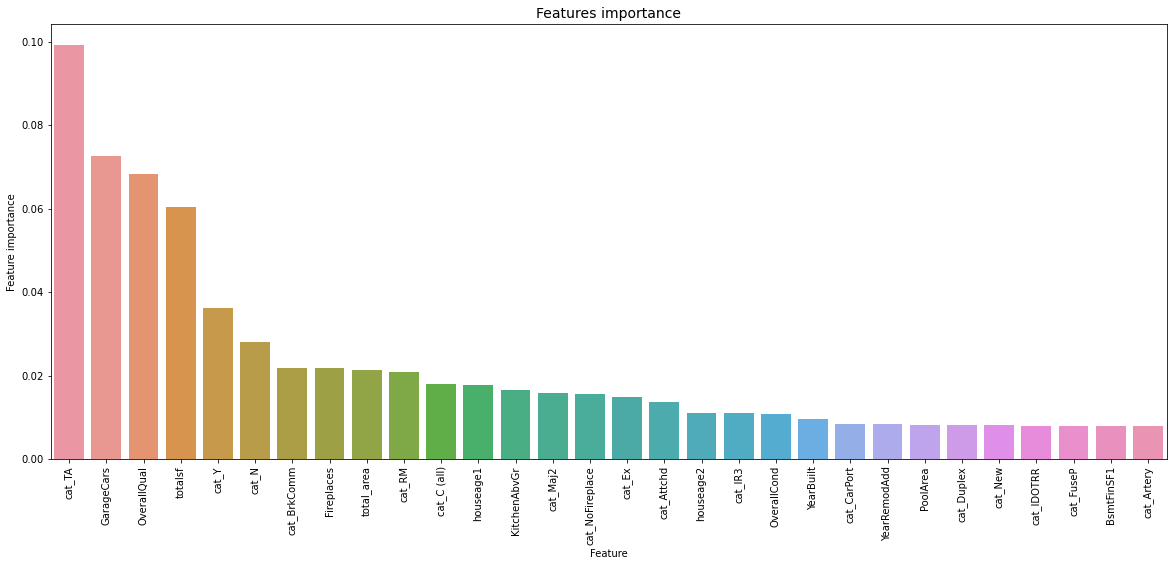

In [51]:
tmp_xgboost = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': xgbmodelfit.feature_importances_})
tmp_xgboost = tmp_xgboost.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (20,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp_xgboost[:30])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [52]:
tmp_xgboost[:20]

,Feature,Feature importance
146,cat_TA,0.099279
24,GarageCars,0.072717
3,OverallQual,0.068213
40,totalsf,0.060518
166,cat_Y,0.036092
165,cat_N,0.028014
125,cat_BrkComm,0.021864
23,Fireplaces,0.021769
37,total_area,0.021361
46,cat_RM,0.020781


## Random Forest

In [53]:
model = RandomForestRegressor(n_jobs=-1,random_state =1234)
# Try different numbers of n_estimators - takes some time
estimators = np.arange(1, 500, 10)
rmse_rf = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    ypred = model.predict(X_val)
    rmse_rf.append(np.sqrt(np.mean(np.square(y_val - ypred))))  


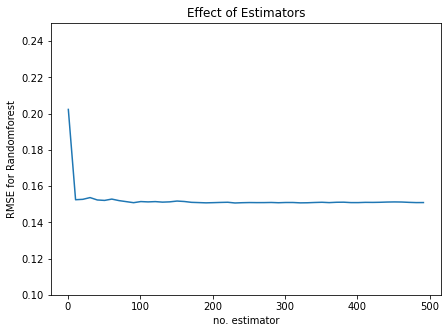

In [54]:
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("RMSE for Randomforest")
plt.ylim((0.1,0.25))
plt.plot(estimators, rmse_rf)

In [55]:
%timeit
rf_model = RandomForestRegressor(n_estimators = 500, n_jobs = -1,random_state =1234)
rfmodel = rf_model.fit(X_train, y_train)

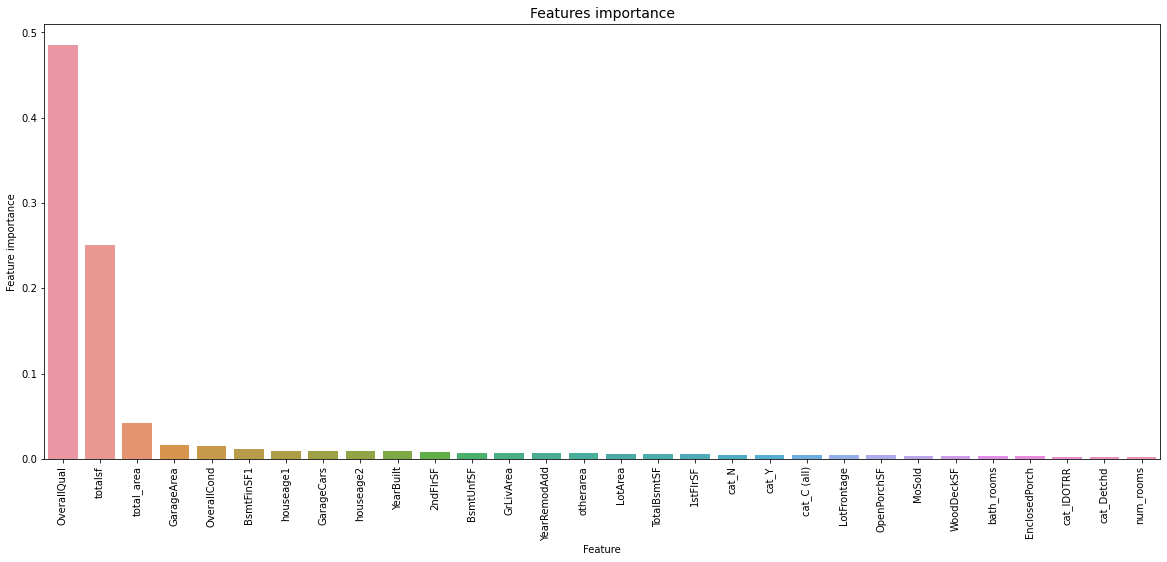

In [56]:
tmp_rf = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': rfmodel.feature_importances_})
tmp_rf = tmp_rf.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (20,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp_rf[:30])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

# Compare the different model results

In [57]:
feature1 = tmp_cat[:30]["Feature"] 
feature2 = tmp_xgboost[:30]["Feature"]
feature3 = tmp_rf[:30]["Feature"]

In [58]:
featuresranking = pd.DataFrame()
featuresranking['feature1'] = feature1
featuresranking['feature2'] = feature2
featuresranking['feature3'] = feature3

# We can see the three models are working almost all very good, and the top features are nearly the same, especially the top 6 variables. However, they have slightly different results in the following features

In [59]:
featuresranking[:30] 

,feature1,feature2,feature3
3,OverallQual,OverallQual,OverallQual
37,total_area,total_area,total_area
40,totalsf,totalsf,totalsf
4,OverallCond,OverallCond,OverallCond
5,YearBuilt,YearBuilt,YearBuilt
24,GarageCars,GarageCars,GarageCars
15,GrLivArea,NaN,GrLivArea
8,BsmtFinSF1,BsmtFinSF1,BsmtFinSF1
35,houseage1,houseage1,houseage1
2,LotArea,NaN,LotArea


# We can see the top three variables actually have high corrlations between each other, howerver, as I mentioned, the tree and boosting algorithm are nonparametric models, they do not have assumptions such as the regression model, so they pick up those top features however they might have higly correlations within each other. 

<AxesSubplot:>

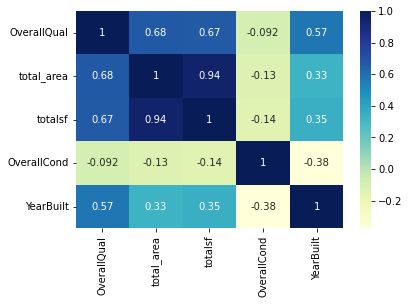

In [60]:
sns.heatmap(train[['OverallQual','total_area','totalsf', 'OverallCond','YearBuilt']].corr(),cmap="YlGnBu", annot=True)

# Compare the RMSE results of the different models

# Catboost performs best amomg the three models on this dataset

In [61]:
print(cbresult['validation']['RMSE'][-1])
print(tempresulst[-1])
print(rmse_rf[-1])

0.12593952935303038
0.130558
0.15090522388713618
